<center><a target="_blank" href="https://academy.constructor.org/">
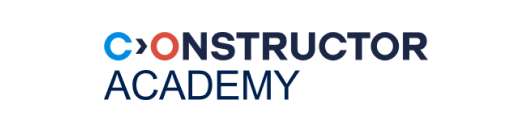</a> </center>
<hr />

# <h1 align="center"> Live coding 1: JSON </h1>

<hr />
<center>Constructor Academy, 2025</center>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> learn how to create, read and write JSON files</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>The JSON String</a></li>
            <li> <a style="color:#303030" href='#P2'>Serialization/Deserialization</a></li>
            <li> <a style="color:#303030" href='#P3'>Write and Read JSON Files</a></li>
            <li> <a style="color:#303030" href='#P4'>Read JSON From URL</a></li>
            <li> <a style="color:#303030" href='#P5'>Explore deserialized JSON strings (dictionaries!)</a></li>
        </ol>
        <strong>Topics Trained:</strong> Requests, REST APIs, JSON
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669" title="momentum"> Module 1, The Data Science Toolkit </a>|
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669/6fae75a0-535c-4bb3-ae75-07cbda932024" title="momentum">Day 3, JSON, REST APIS, the Request Module </a>|
        <a style="color:#00BAE5" href="https://drive.google.com/uc?export=download&id=1U4jqdswBXkCL2qzkubximUNPh9MT8SBr" title="momentum"> Live Coding 1, JSON</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [6]:
import json
import requests
from pandas import json_normalize

<a id='P1' name="P1"></a>
## [The JSON String](#P0)

- JSON - Javascript Object Notation
- Standard for exchanging data between client (browser) and server
- Replaced XML as standard for the web (more compact and easier to read)
- Set of key/value pairs
- Easy to serialise objects

Example of a JSON string:

In [1]:
json_string = """
{
 "batch_tag": "Month Year Location",
 "start_date": {"month": "xx"},
 "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},
 "students": [
             {"name": "first_name", "surname": "last_name"}
             ]}
"""

In [2]:
json_string

'\n{\n "batch_tag": "Month Year Location",\n "start_date": {"month": "xx"},\n "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},\n "students": [\n             {"name": "first_name", "surname": "last_name"}\n             ]}\n'

In [3]:
type(json_string)

str

### JSON vs XML

- XML - Extensible Markup Language
- JSON - JavaScript Object Notation


In [ ]:
XML = """
<users>
    <user>
        <username>SammyShark</username> <location>Indian Ocean</location>
    </user>
    <user>
        <username>JesseOctopus</username> <location>Pacific Ocean</location>
    </user>
    <user>
        <username>DrewSquir</username> <location>Atlantic Ocean</location>
    </user>
    <user>
        <username>JamieMantisShrimp</username> <location>Pacific Ocean</location>
    </user>
</users>"""

print(len(XML))  # 417 chars

JSON = """
{"users": [
      {"username" : "SammyShark", "location" : ["Indian Ocean","Pacific Ocean"], "age": 42},
      {"username" : "JesseOctopus", "location" : ["Pacific Ocean"]},
      {"username" : "DrewSquid", "location" : ["Atlantic Ocean"]},
      {"username" : "JamieMantisShrimp", "location" : ["Pacific Ocean"]}
] }
"""
print(len(JSON))

# 284 chars

417
284


<a id='P2' name="P2"></a>
## [Serialization/Deserialization](#P0)

- Serialization - convert the data into the format suitable for sending over the network
- Deserialization - from  network format to local data

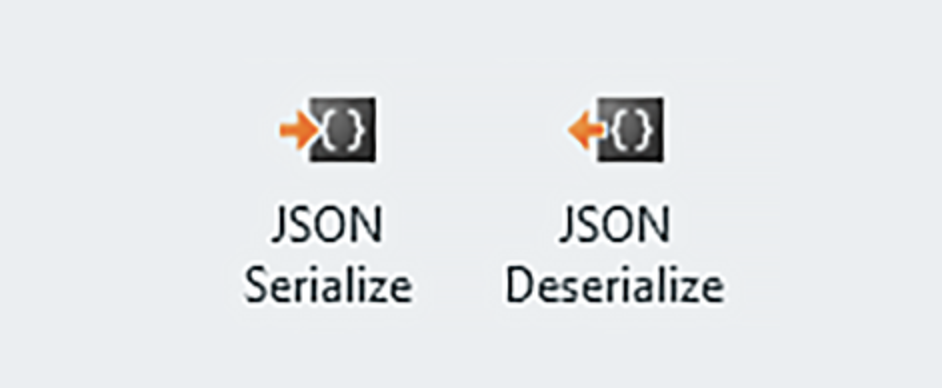

### Receive the reply from server - deserialize:

In [4]:
json_string

'\n{\n "batch_tag": "Month Year Location",\n "start_date": {"month": "xx"},\n "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},\n "students": [\n             {"name": "first_name", "surname": "last_name"}\n             ]}\n'

In [9]:
json_string = """
{
 "batch_tag": "Month Year Location",
 "start_date": {"month": "xx"},
 "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},
 "students": [
             {"name": "first_name", "surname": "last_name"},
             {"name": "first_name", "surname": "last_name"}
             ]}
"""

In [10]:
# FIRST load from strings, deserialize, get python dict
dict_from_string = json.loads(json_string)
dict_from_string

{'batch_tag': 'Month Year Location',
 'start_date': {'month': 'xx'},
 'curriculum': {'Week1': 'DS Toolkit', 'Week2': '?'},
 'students': [{'name': 'first_name', 'surname': 'last_name'},
  {'name': 'first_name', 'surname': 'last_name'}]}

In [8]:
type(dict_from_string)

dict

In python JSON files are deserialized as dictionaries:
- 'value' can be almost anything  
- 'key' should be immutable!   

A tuple can also be a dictionary key.
However, neither a list nor another dictionary can serve as a dictionary key, because lists and dictionaries are mutable.

### Pass arguments to remote – serialize  

Dump json into string, serialize ``obj`` to a JSON formatted ``str`` (if you want to store or transmit data).  
Returns the JSON string representation of the python dict.

In [11]:
dict_from_string

{'batch_tag': 'Month Year Location',
 'start_date': {'month': 'xx'},
 'curriculum': {'Week1': 'DS Toolkit', 'Week2': '?'},
 'students': [{'name': 'first_name', 'surname': 'last_name'},
  {'name': 'first_name', 'surname': 'last_name'}]}

In [13]:
new_json_string = json.dumps(dict_from_string)
new_json_string

'{"batch_tag": "Month Year Location", "start_date": {"month": "xx"}, "curriculum": {"Week1": "DS Toolkit", "Week2": "?"}, "students": [{"name": "first_name", "surname": "last_name"}, {"name": "first_name", "surname": "last_name"}]}'

In [14]:
type(new_json_string)

str

<a id='P3' name="P3"></a>
## [Write and Read JSON Files](#P0)

In [15]:
dict_from_string

{'batch_tag': 'Month Year Location',
 'start_date': {'month': 'xx'},
 'curriculum': {'Week1': 'DS Toolkit', 'Week2': '?'},
 'students': [{'name': 'first_name', 'surname': 'last_name'},
  {'name': 'first_name', 'surname': 'last_name'}]}

In [16]:
# save as json file (dump), it is a string, not dictionary
with open("ds_program.json", "w") as output:
    json.dump(dict_from_string, output)

In [17]:
# open as json file (load)
with open("ds_program.json") as json_file:
    data_json1 = json.load(json_file)
data_json1

{'batch_tag': 'Month Year Location',
 'start_date': {'month': 'xx'},
 'curriculum': {'Week1': 'DS Toolkit', 'Week2': '?'},
 'students': [{'name': 'first_name', 'surname': 'last_name'},
  {'name': 'first_name', 'surname': 'last_name'}]}

In [18]:
# another way to load the json file (shorter)
data_json2 = json.load(open("ds_program.json"))

In [19]:
data_json2

{'batch_tag': 'Month Year Location',
 'start_date': {'month': 'xx'},
 'curriculum': {'Week1': 'DS Toolkit', 'Week2': '?'},
 'students': [{'name': 'first_name', 'surname': 'last_name'},
  {'name': 'first_name', 'surname': 'last_name'}]}

<a id='P4' name="P4"></a>
## [Read JSON from a URL](#P0)

**Exercise** 5 min:   
Load .json from URL. Try translating the following instruction into code:

1. use `requests` library and `get` function of this library to send a HTTPS request to the URL.
2. print the content attribute of the object that is returned from the get request.
3. Then, deserialize the content attribute
4. explore the obtained dictionary

In [21]:
url = "https://api.balldontlie.io/v1/players"
headers = {'Authorization': 'a25e92f0-92a2-4ed3-be24-028c4a7ab620'}

There is actually a more concise way of deserializing the content of the response object returned by the get function: you can directly use the method `.json()` on it. Try and see if it works!

### Questions

- Remember examples on how did you use APIs recently, name several such cases.
- Try to extend 'ds' dictionary with additional key-value pair and access this key.  
- API for data retrieval - what can interfere with fast and painless data mining?



In [39]:
response = requests.get(url)#.json()
response

<Response [401]>

In [44]:
response = requests.get(url, headers= headers)

In [31]:
response

<Response [200]>

In [32]:
response.headers

{'Date': 'Wed, 06 Aug 2025 09:24:46 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'access-control-allow-headers': 'Origin, X-Requested-With, Content-Type, Accept, Authorization', 'access-control-allow-methods': 'GET, POST, OPTIONS, PUT, PATCH, DELETE', 'access-control-allow-origin': '*', 'etag': 'W/"2328-rM0+xiBBRFIZLr57jf0L+sCNLHo"', 'rndr-id': '76ecfb05-69ce-4b96', 'vary': 'Accept-Encoding', 'x-powered-by': 'Express', 'x-ratelimit-limit': '5', 'x-ratelimit-remaining': '3', 'x-ratelimit-reset': '1754472331', 'x-render-origin-server': 'Render', 'cf-cache-status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '96ad7ba95b681453-ZRH', 'Content-Encoding': 'gzip', 'alt-svc': 'h3=":443"; ma=86400'}

In [34]:
response.status_code

200

In [33]:
response.content

b'{"data":[{"id":1,"first_name":"Alex","last_name":"Abrines","position":"G","height":"6-6","weight":"190","jersey_number":"8","college":"FC Barcelona","country":"Spain","draft_year":2013,"draft_round":2,"draft_number":32,"team":{"id":21,"conference":"West","division":"Northwest","city":"Oklahoma City","name":"Thunder","full_name":"Oklahoma City Thunder","abbreviation":"OKC"}},{"id":2,"first_name":"Jaylen","last_name":"Adams","position":"G","height":"6-0","weight":"225","jersey_number":"10","college":"St. Bonaventure","country":"USA","draft_year":null,"draft_round":null,"draft_number":null,"team":{"id":1,"conference":"East","division":"Southeast","city":"Atlanta","name":"Hawks","full_name":"Atlanta Hawks","abbreviation":"ATL"}},{"id":3,"first_name":"Steven","last_name":"Adams","position":"C","height":"6-11","weight":"265","jersey_number":"12","college":"Pittsburgh","country":"New Zealand","draft_year":2013,"draft_round":1,"draft_number":12,"team":{"id":11,"conference":"West","division":

In [42]:
# nba_json = json.loads(response.text)

In [36]:
nba_json = response.json()

In [46]:
nba_json = json.loads(response.text)

In [40]:
type(nba_json)

dict

<a id='P5' name="P5"></a>
## [Explore deserialized JSON strings (dictionaries!)](#P0)

In [47]:
nba_json.keys()

dict_keys(['data', 'meta'])

In [49]:
# nba_json.items()

Most straightforward way to get keys (or values) is  

```python
my_dict.keys()
my_dict.values()
```

but keep in mind - it is not possible to access specific key by index (in python 3)

In [50]:
nba_json.values()  # values() might be confusing

dict_values([[{'id': 1, 'first_name': 'Alex', 'last_name': 'Abrines', 'position': 'G', 'height': '6-6', 'weight': '190', 'jersey_number': '8', 'college': 'FC Barcelona', 'country': 'Spain', 'draft_year': 2013, 'draft_round': 2, 'draft_number': 32, 'team': {'id': 21, 'conference': 'West', 'division': 'Northwest', 'city': 'Oklahoma City', 'name': 'Thunder', 'full_name': 'Oklahoma City Thunder', 'abbreviation': 'OKC'}}, {'id': 2, 'first_name': 'Jaylen', 'last_name': 'Adams', 'position': 'G', 'height': '6-0', 'weight': '225', 'jersey_number': '10', 'college': 'St. Bonaventure', 'country': 'USA', 'draft_year': None, 'draft_round': None, 'draft_number': None, 'team': {'id': 1, 'conference': 'East', 'division': 'Southeast', 'city': 'Atlanta', 'name': 'Hawks', 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL'}}, {'id': 3, 'first_name': 'Steven', 'last_name': 'Adams', 'position': 'C', 'height': '6-11', 'weight': '265', 'jersey_number': '12', 'college': 'Pittsburgh', 'country': 'New Zealand', 

In [51]:
nba_json["meta"]  # not much here

{'next_cursor': 25, 'per_page': 25}

In [52]:
nba_json["data"]  # this looks more interesting

[{'id': 1,
  'first_name': 'Alex',
  'last_name': 'Abrines',
  'position': 'G',
  'height': '6-6',
  'weight': '190',
  'jersey_number': '8',
  'college': 'FC Barcelona',
  'country': 'Spain',
  'draft_year': 2013,
  'draft_round': 2,
  'draft_number': 32,
  'team': {'id': 21,
   'conference': 'West',
   'division': 'Northwest',
   'city': 'Oklahoma City',
   'name': 'Thunder',
   'full_name': 'Oklahoma City Thunder',
   'abbreviation': 'OKC'}},
 {'id': 2,
  'first_name': 'Jaylen',
  'last_name': 'Adams',
  'position': 'G',
  'height': '6-0',
  'weight': '225',
  'jersey_number': '10',
  'college': 'St. Bonaventure',
  'country': 'USA',
  'draft_year': None,
  'draft_round': None,
  'draft_number': None,
  'team': {'id': 1,
   'conference': 'East',
   'division': 'Southeast',
   'city': 'Atlanta',
   'name': 'Hawks',
   'full_name': 'Atlanta Hawks',
   'abbreviation': 'ATL'}},
 {'id': 3,
  'first_name': 'Steven',
  'last_name': 'Adams',
  'position': 'C',
  'height': '6-11',
  'weight'

In [53]:
type(nba_json["data"])

list

In [54]:
# since its a list of items we can dive in further
nba_json["data"][0]

{'id': 1,
 'first_name': 'Alex',
 'last_name': 'Abrines',
 'position': 'G',
 'height': '6-6',
 'weight': '190',
 'jersey_number': '8',
 'college': 'FC Barcelona',
 'country': 'Spain',
 'draft_year': 2013,
 'draft_round': 2,
 'draft_number': 32,
 'team': {'id': 21,
  'conference': 'West',
  'division': 'Northwest',
  'city': 'Oklahoma City',
  'name': 'Thunder',
  'full_name': 'Oklahoma City Thunder',
  'abbreviation': 'OKC'}}

In [55]:
nba_json["data"][12]

{'id': 13,
 'first_name': 'Ryan',
 'last_name': 'Anderson',
 'position': 'F',
 'height': '6-10',
 'weight': '240',
 'jersey_number': '31',
 'college': 'California',
 'country': 'USA',
 'draft_year': 2008,
 'draft_round': 1,
 'draft_number': 21,
 'team': {'id': 19,
  'conference': 'West',
  'division': 'Southwest',
  'city': 'New Orleans',
  'name': 'Pelicans',
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP'}}

In [56]:
nba_json["data"][0].keys()  # [0]

dict_keys(['id', 'first_name', 'last_name', 'position', 'height', 'weight', 'jersey_number', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'team'])

In [58]:
nba_json["data"][0]['team'].keys()

dict_keys(['id', 'conference', 'division', 'city', 'name', 'full_name', 'abbreviation'])

Sometimes you need to loop through items

In [61]:
# if index is not needed
for player_dict in nba_json['data']:
    # Access the division of each player
    division = player_dict['team']['division']
    # Print the division of each player
    print(f"Player: {player_dict['first_name']} - Division: {division}")

Player: Alex - Division: Northwest
Player: Jaylen - Division: Southeast
Player: Steven - Division: Southwest
Player: Bam - Division: Southeast
Player: DeVaughn - Division: Northwest
Player: LaMarcus - Division: Atlantic
Player: Rawle - Division: Central
Player: Grayson - Division: Pacific
Player: Jarrett - Division: Central
Player: Al-Farouq - Division: Northwest
Player: Justin - Division: Central
Player: Kyle - Division: Southeast
Player: Ryan - Division: Southwest
Player: Ike - Division: Central
Player: Giannis - Division: Central
Player: Kostas - Division: Central
Player: Carmelo - Division: Pacific
Player: OG - Division: Atlantic
Player: Ryan - Division: Atlantic
Player: Trevor - Division: Pacific
Player: D.J. - Division: Pacific
Player: Deandre - Division: Northwest
Player: Dwayne - Division: Pacific
Player: Marvin - Division: Southwest
Player: Ron - Division: Atlantic


In [62]:
# if index is needed -> enumerate
for index, player in enumerate(nba_json['data']):
    # Access the division of each player
    division = player['team']['division']
    # Print the index and the division of each player
    print(f"Player {index + 1} is in the {division} division.")

Player 1 is in the Northwest division.
Player 2 is in the Southeast division.
Player 3 is in the Southwest division.
Player 4 is in the Southeast division.
Player 5 is in the Northwest division.
Player 6 is in the Atlantic division.
Player 7 is in the Central division.
Player 8 is in the Pacific division.
Player 9 is in the Central division.
Player 10 is in the Northwest division.
Player 11 is in the Central division.
Player 12 is in the Southeast division.
Player 13 is in the Southwest division.
Player 14 is in the Central division.
Player 15 is in the Central division.
Player 16 is in the Central division.
Player 17 is in the Pacific division.
Player 18 is in the Atlantic division.
Player 19 is in the Atlantic division.
Player 20 is in the Pacific division.
Player 21 is in the Pacific division.
Player 22 is in the Northwest division.
Player 23 is in the Pacific division.
Player 24 is in the Southwest division.
Player 25 is in the Atlantic division.


In [63]:
# Initialize a set to store unique divisions
unique_divisions = set()

# Loop through each player in the list
for player in nba_json['data']:
    # Extract the division from each player's team data
    division = player['team']['division']
    # Add the division to the set of unique divisions
    unique_divisions.add(division)

# Print all unique divisions
print("Unique Divisions:", unique_divisions)

Unique Divisions: {'Northwest', 'Central', 'Atlantic', 'Southwest', 'Southeast', 'Pacific'}


When there is a pattern, one can try to normalize semi-structured JSON data into a flat table

### Normalization

```python
# Normalize structured JSON data into a flat table
from pandas import json_normalize

json_normalize(...)
```

**Exercise**:

Try to normalize the list of structured dictionaries above

In [64]:
import pandas as pd

In [66]:
nba_json['data']

[{'id': 1,
  'first_name': 'Alex',
  'last_name': 'Abrines',
  'position': 'G',
  'height': '6-6',
  'weight': '190',
  'jersey_number': '8',
  'college': 'FC Barcelona',
  'country': 'Spain',
  'draft_year': 2013,
  'draft_round': 2,
  'draft_number': 32,
  'team': {'id': 21,
   'conference': 'West',
   'division': 'Northwest',
   'city': 'Oklahoma City',
   'name': 'Thunder',
   'full_name': 'Oklahoma City Thunder',
   'abbreviation': 'OKC'}},
 {'id': 2,
  'first_name': 'Jaylen',
  'last_name': 'Adams',
  'position': 'G',
  'height': '6-0',
  'weight': '225',
  'jersey_number': '10',
  'college': 'St. Bonaventure',
  'country': 'USA',
  'draft_year': None,
  'draft_round': None,
  'draft_number': None,
  'team': {'id': 1,
   'conference': 'East',
   'division': 'Southeast',
   'city': 'Atlanta',
   'name': 'Hawks',
   'full_name': 'Atlanta Hawks',
   'abbreviation': 'ATL'}},
 {'id': 3,
  'first_name': 'Steven',
  'last_name': 'Adams',
  'position': 'C',
  'height': '6-11',
  'weight'

In [67]:
nba_df = pd.json_normalize(nba_json['data'])

In [68]:
nba_df

id first_name      last_name position height weight jersey_number  \
0    1       Alex        Abrines        G    6-6    190             8   
1    2     Jaylen          Adams        G    6-0    225            10   
2    3     Steven          Adams        C   6-11    265            12   
3    4        Bam        Adebayo      C-F    6-9    255            13   
4    5   DeVaughn  Akoon-Purcell      G-F    6-5    201            44   
5    6   LaMarcus       Aldridge        F   6-11    250            21   
6    7      Rawle         Alkins        G    6-5    225            20   
7    8    Grayson          Allen        G    6-4    198             8   
8    9    Jarrett          Allen        C    6-9    243            31   
9   10  Al-Farouq          Aminu        F    6-8    220             5   
10  11     Justin       Anderson      G-F    6-5    231            10   
11  12       Kyle       Anderson        F    6-9    230            20   
12  13       Ryan       Anderson        F   6-10    240            31   
13  14        Ike       Anigbogu        C   6-10    262            13   
14  15    Giannis  Antetokounmpo        F   6-11    243            34   
15  16     Kostas  Antetokounmpo        F   6-10    200            37   
16  17    Carmelo        Anthony        F    6-7    238             7   
17  18         OG        Anunoby        F    6-7    240             8   
18  19       Ryan    Arcidiacono        G    6-3    195            51   
19  20     Trevor          Ariza        F    6-8    215             8   
20  21       D.J.       Augustin        G   5-11    183             4   
21  22    Deandre          Ayton        C    7-0    252             2   
22  23     Dwayne          Bacon      G-F    6-6    221             8   
23  24     Marvin     Bagley III        F   6-10    235            35   
24  25        Ron          Baker        G    6-4    220            31   

                          college              country  draft_year  \
0                    FC Barcelona                Spain      2013.0   
1                 St. Bonaventure                  USA         NaN   
2                      Pittsburgh          New Zealand      2013.0   
3                        Kentucky                  USA      2017.0   
4                  Illinois State  Trinidad and Tobago      2016.0   
5   University of Texas at Austin                  USA      2006.0   
6                         Arizona                  USA         NaN   
7                            Duke                  USA      2018.0   
8                           Texas                  USA      2017.0   
9                     Wake Forest                  USA      2010.0   
10                       Virginia                  USA      2015.0   
11                           UCLA                  USA      2014.0   
12                     California                  USA      2008.0   
13                           UCLA                  USA      2017.0   
14                  Filathlitikos               Greece      2013.0   
15                         Dayton               Greece      2018.0   
16                       Syracuse                  USA      2003.0   
17                        Indiana       United Kingdom      2017.0   
18                      Villanova                  USA         NaN   
19                           UCLA                  USA      2004.0   
20                          Texas                  USA      2008.0   
21                        Arizona              Bahamas      2018.0   
22                  Florida State                  USA      2017.0   
23                           Duke                  USA      2018.0   
24                  Wichita State                  USA         NaN   

    draft_round  draft_number  team.id team.conference team.division  \
0           2.0          32.0       21            West     Northwest   
1           NaN           NaN        1            East     Southeast   
2           1.0          12.0       11            West     Southwest

In [69]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25 non-null     int64  
 1   first_name         25 non-null     object 
 2   last_name          25 non-null     object 
 3   position           25 non-null     object 
 4   height             25 non-null     object 
 5   weight             25 non-null     object 
 6   jersey_number      25 non-null     object 
 7   college            25 non-null     object 
 8   country            25 non-null     object 
 9   draft_year         21 non-null     float64
 10  draft_round        20 non-null     float64
 11  draft_number       20 non-null     float64
 12  team.id            25 non-null     int64  
 13  team.conference    25 non-null     object 
 14  team.division      25 non-null     object 
 15  team.city          25 non-null     object 
 16  team.name          25 non-nu

**Summary**:

This was an example on how to access structured data that web services provide us for free and without registration. But this is not always the case. Some of them don't want to work for free (and it is understandable - storing data and providing API cost money). Some of them want to know where the data will go, so they demand registration!

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>